In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [6]:
deliveries.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,AJ Hosein,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,AJ Hosein,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'] = matches.loc[(matches['team1'] == 'Oman') & (matches['team2'] == 'Namibia'), 'winner'].fillna('Namibia')
matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'] = matches.loc[(matches['team1'] == 'Pakistan') & (matches['team2'] == 'United States of America'), 'winner'].fillna('United States of America')

In [8]:
matches.shape

(52, 18)

In [9]:
deliveries.shape

(11472, 22)

In [10]:
win_counts = matches['winner'].value_counts()

max_wins = win_counts.max()
teams_with_most_wins = win_counts[win_counts == max_wins].index.tolist()

teams_str = ", ".join(teams_with_most_wins)
print(f"Teams with the most wins: {teams_str} ({max_wins} wins)")

Teams with the most wins: South Africa, India (8 wins)


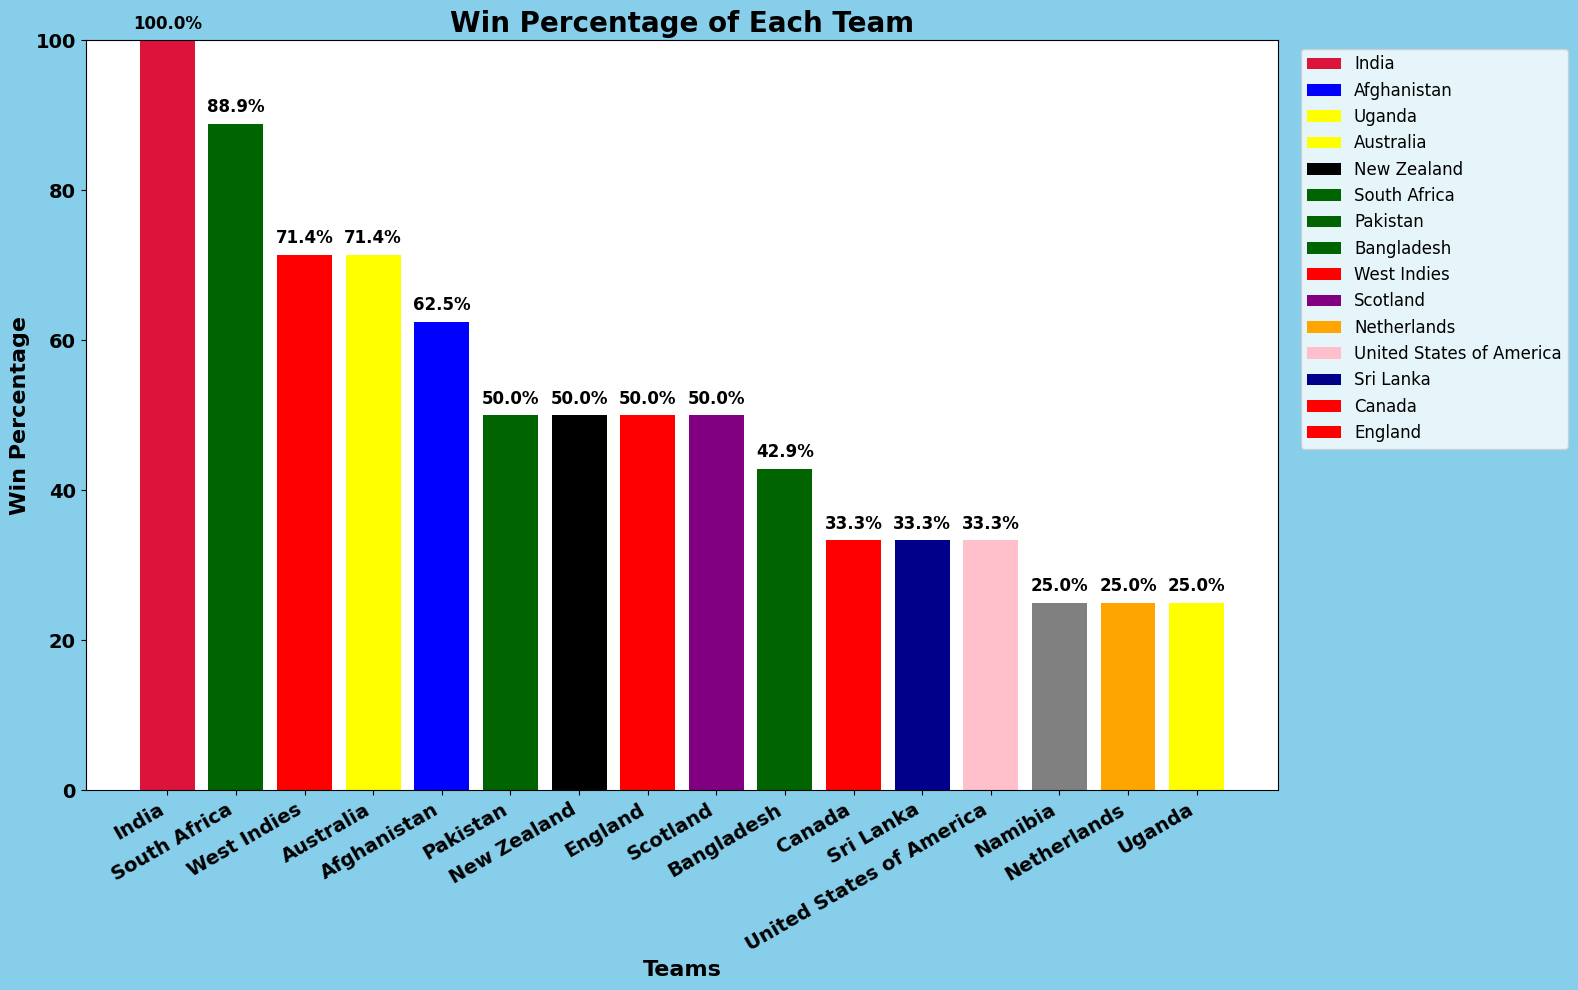

In [12]:
all_teams = pd.concat([matches['team1'], matches['team2']])

total_matches = all_teams.value_counts()

team_wins = matches['winner'].value_counts()

win_percentage = (team_wins / total_matches) * 100

win_percentage_sorted = win_percentage.sort_values(ascending=False)

win_percentage_sorted = win_percentage_sorted[win_percentage_sorted > 0]

nation_colors = {
    'India': 'crimson',
    'Afghanistan': 'blue',
    'Uganda': 'yellow',
    'Australia': 'yellow',
    'New Zealand': 'black',
    'South Africa': 'darkgreen',
    'Pakistan': 'darkgreen',
    'Bangladesh': 'darkgreen',
    'West Indies': 'red',
    'Scotland': 'purple',
    'Netherlands': 'orange',
    'United States of America': 'pink',
    'Sri Lanka': 'darkblue',
    'Canada': 'red',
    'England': 'red'
}

colors = [nation_colors.get(team, 'gray') for team in win_percentage_sorted.index]

plt.figure(figsize=(16, 10), facecolor='skyblue')

bars = plt.bar(win_percentage_sorted.index, win_percentage_sorted, color=colors)

plt.xlabel('Teams', fontsize=16, weight='bold')
plt.ylabel('Win Percentage', fontsize=16, weight='bold')
plt.title('Win Percentage of Each Team', fontsize=20, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.ylim(0, 100)

for bar, percentage in zip(bars, win_percentage_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
            ha='center', va='bottom', fontsize=12, weight='bold')

legend_handles = []
for team, color in nation_colors.items():
    if team in win_percentage_sorted.index:
        legend_handles.append(plt.bar([team], [0], color=color))

plt.legend(legend_handles, nation_colors.keys(), loc='upper right', bbox_to_anchor=(1.25, 1), fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
toss_match_outcome = matches[matches['toss_winner'] == matches['winner']]

toss_win_and_match_win_count = toss_match_outcome.shape[0]
total_matches_count = matches.shape[0]

print(f"Toss winner also won the match {toss_win_and_match_win_count} times out of {total_matches_count} matches.")

Toss winner also won the match 28 times out of 52 matches.


In [14]:
venue_wins = matches.groupby('venue')['winner'].value_counts().sort_values(ascending=False)

most_common_venue = venue_wins.idxmax()[0]

print(f"The most common venue for winning: {most_common_venue}")

The most common venue for winning: Nassau County International Cricket Stadium


In [15]:
chosen_to_bat = matches[(matches['toss_decision'] == 'bat') & (matches['toss_winner'] == matches['winner'])]
chosen_to_field = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])]

batting_win_percentage = (chosen_to_bat.shape[0] / matches.shape[0]) * 100
fielding_win_percentage = (chosen_to_field.shape[0] / matches.shape[0]) * 100

print(f"Percentage of wins after choosing to bat: {batting_win_percentage:.2f}%")
print(f"Percentage of wins after choosing to field: {fielding_win_percentage:.2f}%")

Percentage of wins after choosing to bat: 9.62%
Percentage of wins after choosing to field: 44.23%


In [16]:
batting_first = matches[matches['toss_decision'] == 'bat']
chasing_target = matches[matches['toss_decision'] == 'field']

batting_first_win_percentage = (batting_first[batting_first['winner'] == batting_first['team1']].shape[0] / batting_first.shape[0]) * 100
chasing_win_percentage = (chasing_target[chasing_target['winner'] == chasing_target['team2']].shape[0] / chasing_target.shape[0]) * 100

print(f"Win percentage batting first: {batting_first_win_percentage:.2f}%")
print(f"Win percentage chasing target: {chasing_win_percentage:.2f}%")

Win percentage batting first: 50.00%
Win percentage chasing target: 54.76%


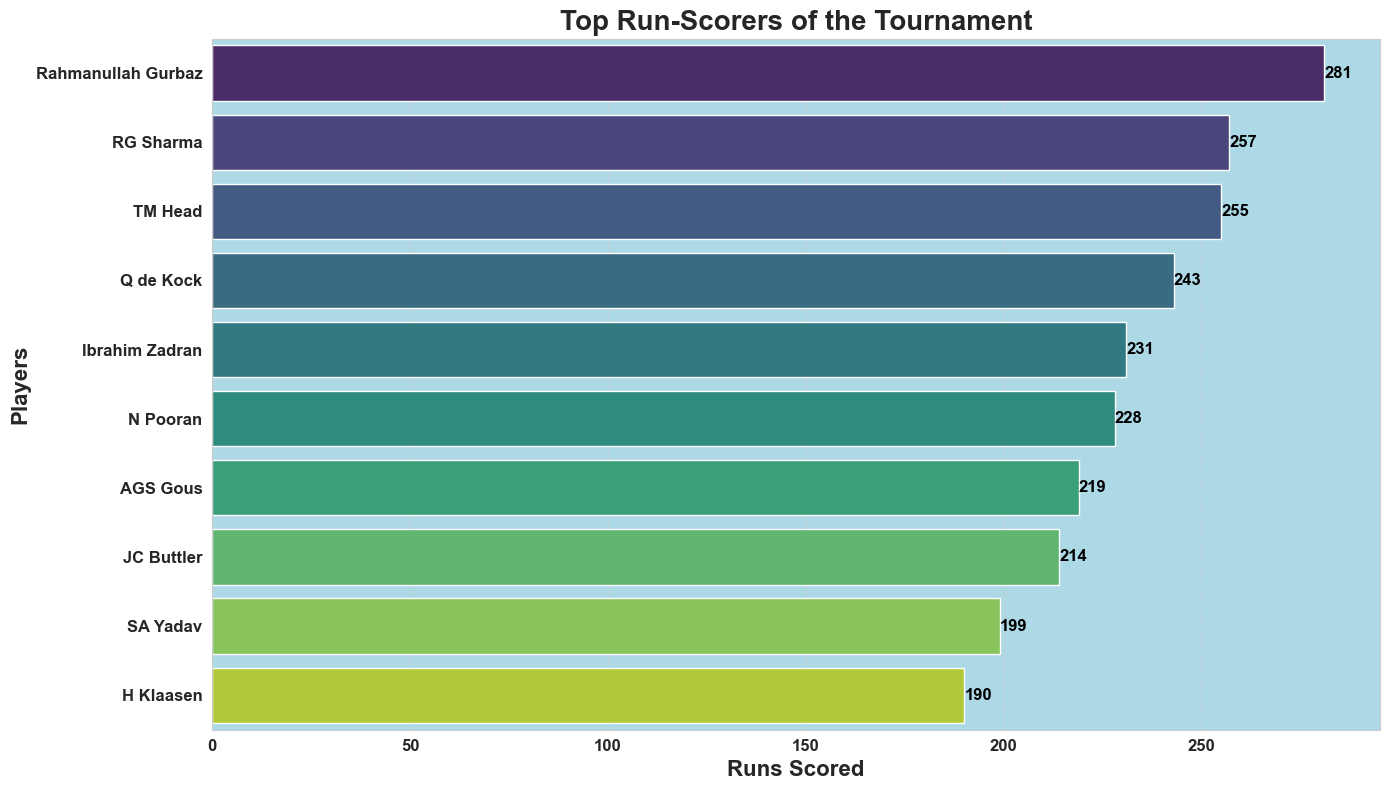

In [17]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_run_scorers.values, y=top_run_scorers.index, palette='viridis')
plt.title('Top Run-Scorers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_run_scorers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()

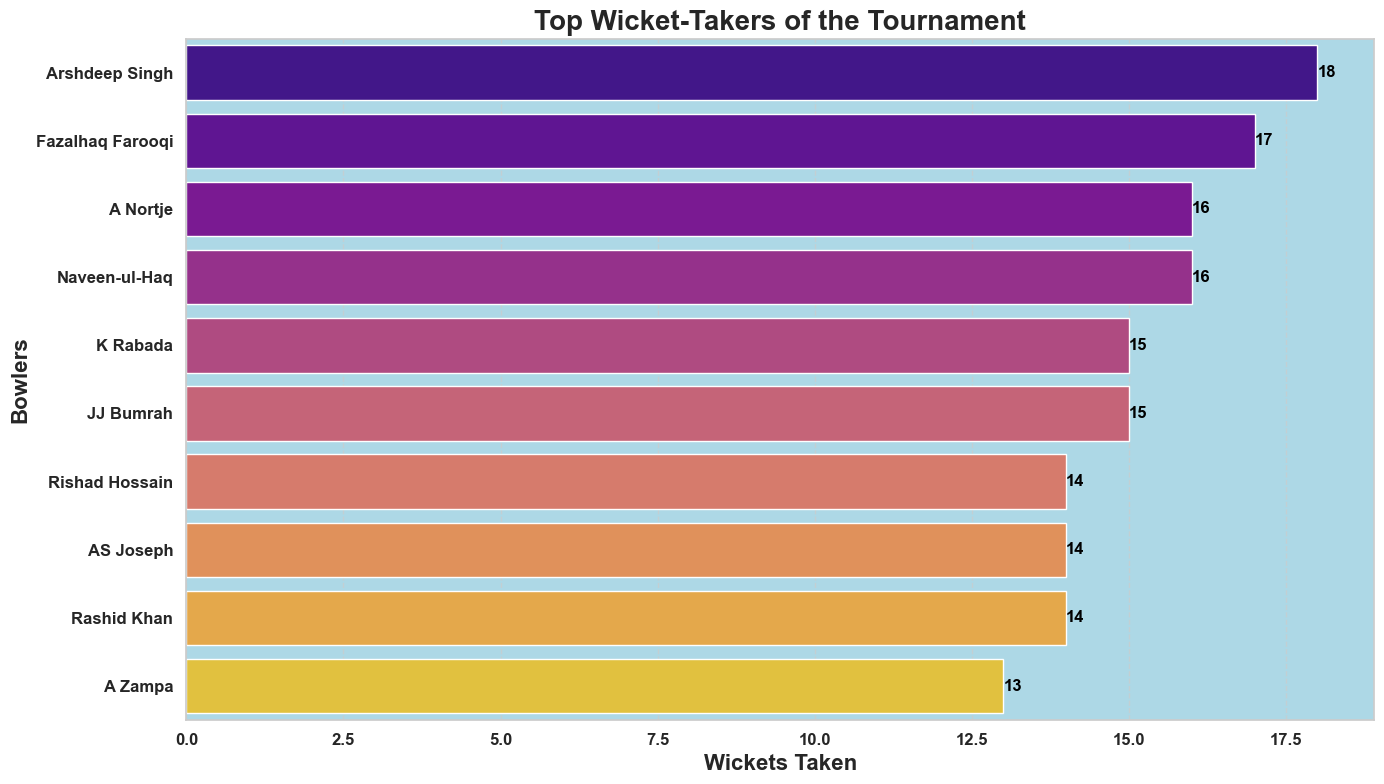

In [18]:
top_wicket_takers = deliveries[deliveries['wicket_type'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

barplot = sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette='plasma')
plt.title('Top Wicket-Takers of the Tournament', fontsize=20, weight='bold')
plt.xlabel('Wickets Taken', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(top_wicket_takers.values):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()

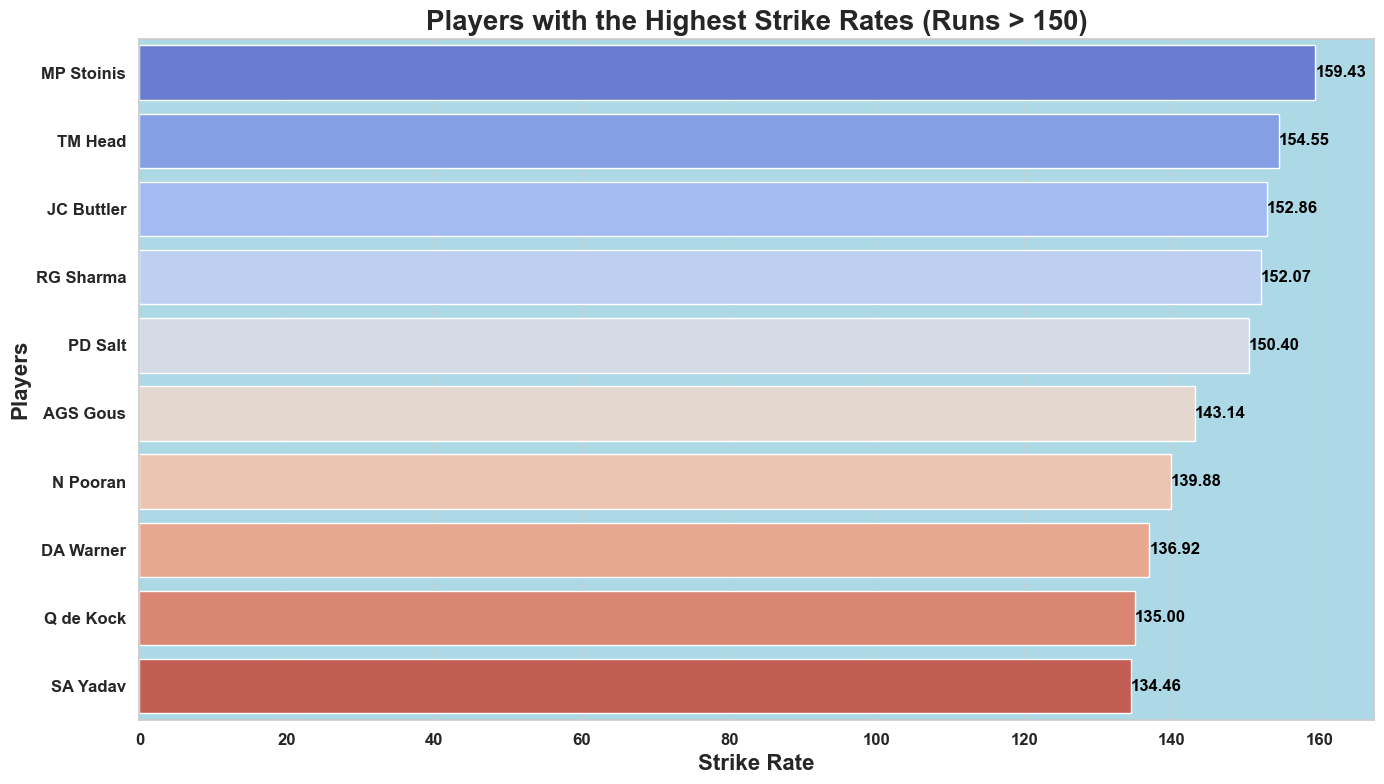

In [19]:
balls_faced = deliveries.groupby('striker').size()
runs_scored = deliveries.groupby('striker')['runs_off_bat'].sum()

strike_rate = (runs_scored / balls_faced) * 100

filtered_strike_rate = strike_rate[runs_scored > 150]

top_strike_rates = filtered_strike_rate.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=top_strike_rates.values, y=top_strike_rates.index, palette='coolwarm')
plt.title('Players with the Highest Strike Rates (Runs > 150)', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Players', fontsize=16, weight='bold')

for index, value in enumerate(top_strike_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()

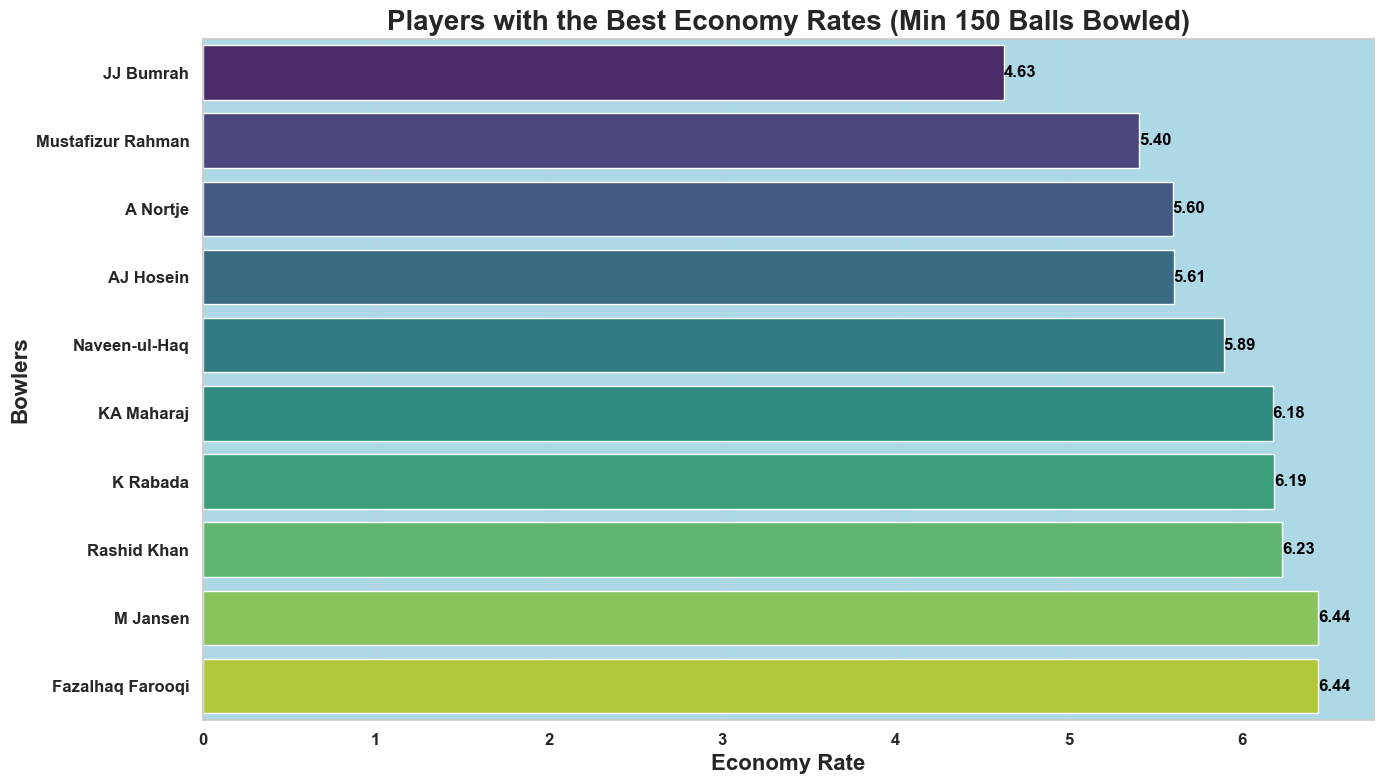

In [20]:
balls_bowled = deliveries.groupby('bowler').size()
runs_conceded = deliveries.groupby('bowler')['runs_off_bat'].sum() + deliveries.groupby('bowler')['extras'].sum()

economy_rate = (runs_conceded / (balls_bowled / 6))

filtered_economy_rate = economy_rate[balls_bowled >= 150]

best_economy_rates = filtered_economy_rate.sort_values().head(10)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=best_economy_rates.values, y=best_economy_rates.index, palette='viridis')
plt.title('Players with the Best Economy Rates (Min 150 Balls Bowled)', fontsize=20, weight='bold')
plt.xlabel('Economy Rate', fontsize=16, weight='bold')
plt.ylabel('Bowlers', fontsize=16, weight='bold')

for index, value in enumerate(best_economy_rates.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()

In [21]:
consistent_batsmen = deliveries.groupby(['match_id', 'striker'])['runs_off_bat'].sum().groupby('striker').mean().sort_values(ascending=False).head(10)
consistent_batsmen = consistent_batsmen.reset_index().rename(columns={"striker": "Batsman", "runs_off_bat": "Striking Rate"})
pd.DataFrame(consistent_batsmen)

,Batsman,Striking Rate
0,BJ McMullen,46.666667
1,AGS Gous,36.500000
2,TM Head,36.428571
3,HC Brook,36.250000
4,SD Hope,35.666667
5,Rahmanullah Gurbaz,35.125000
6,KR Mayers,35.000000
7,RD Berrington,34.000000
8,MP Stoinis,33.800000
9,NR Kirton,33.666667


In [22]:
consistent_bowlers = deliveries[deliveries['wicket_type'].notnull()].groupby(['match_id', 'bowler']).size().groupby('bowler').mean().sort_values(ascending=False).head(10)
consistent_bowlers = consistent_bowlers.reset_index().rename(columns={"bowler": "Bowler", 0: 'Consistency in Economy'})
consistent_bowlers

,Bowler,Consistency in Economy
0,K Bhurtel,4.000000
1,NP Kenjige,3.000000
2,Imad Wasim,3.000000
3,J Miyaji,3.000000
4,OC McCoy,3.000000
5,S Lamichhane,3.000000
6,Fazalhaq Farooqi,2.833333
7,Rashid Khan,2.800000
8,CJ Jordan,2.750000
9,T Shamsi,2.750000


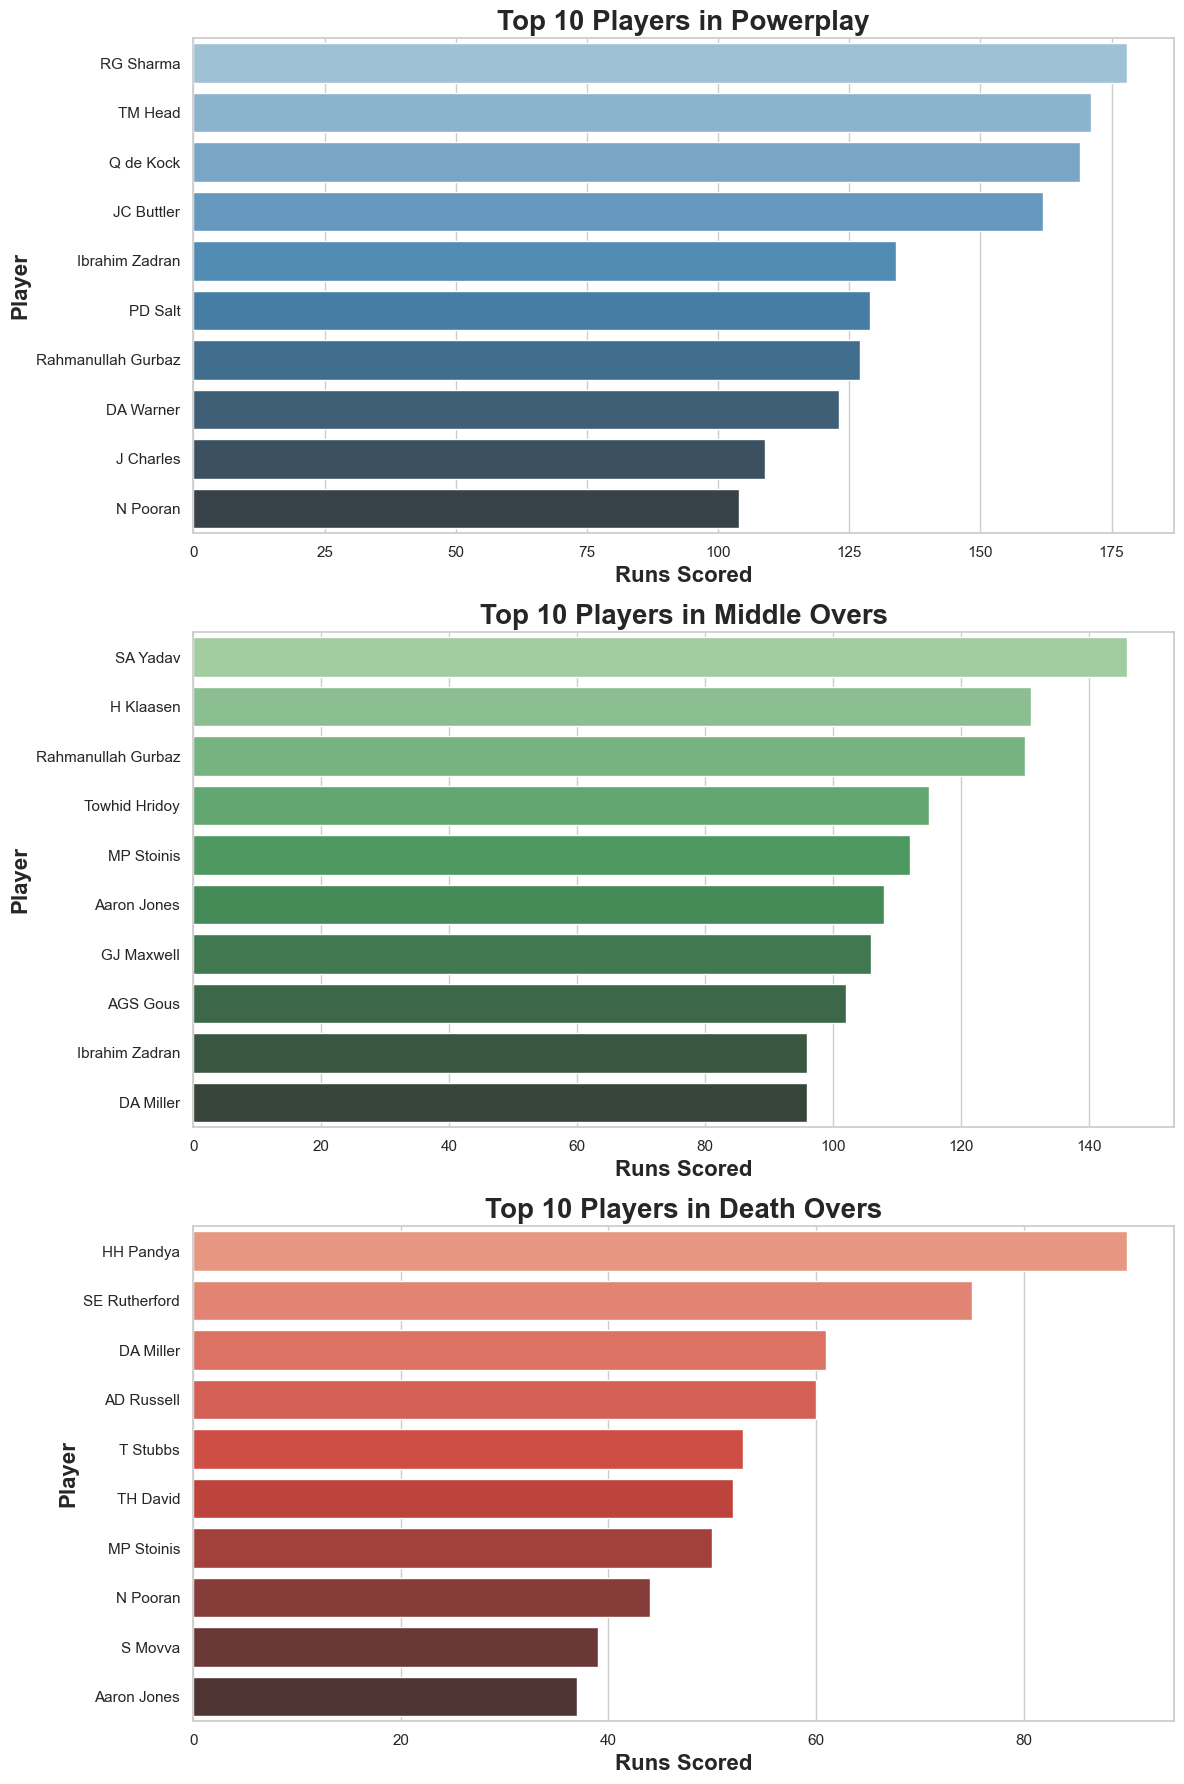

In [23]:
powerplay = deliveries[deliveries['ball'].between(0.1, 6.6)]
middle_overs = deliveries[deliveries['ball'].between(7.1, 15.6)]
death_overs = deliveries[deliveries['ball'].between(16.1, 20.6)]

powerplay_performance = powerplay.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
middle_overs_performance = middle_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
death_overs_performance = death_overs.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
sns.set_style(style="whitegrid")

top10_powerplay = powerplay_performance.head(10).sort_values(ascending=False)
top10_middle_overs = middle_overs_performance.head(10).sort_values(ascending=False)
top10_death_overs = death_overs_performance.head(10).sort_values(ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=top10_powerplay.values, y=top10_powerplay.index, ax=axes[0], palette="Blues_d")
axes[0].set_title('Top 10 Players in Powerplay', fontsize=20, weight='bold')
axes[0].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[0].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_middle_overs.values, y=top10_middle_overs.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Top 10 Players in Middle Overs', fontsize=20, weight='bold')
axes[1].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[1].set_ylabel('Player', fontsize=16, weight='bold')

sns.barplot(x=top10_death_overs.values, y=top10_death_overs.index, ax=axes[2], palette="Reds_d")
axes[2].set_title('Top 10 Players in Death Overs', fontsize=20, weight='bold')
axes[2].set_xlabel('Runs Scored', fontsize=16, weight='bold')
axes[2].set_ylabel('Player', fontsize=16, weight='bold')

plt.tight_layout()

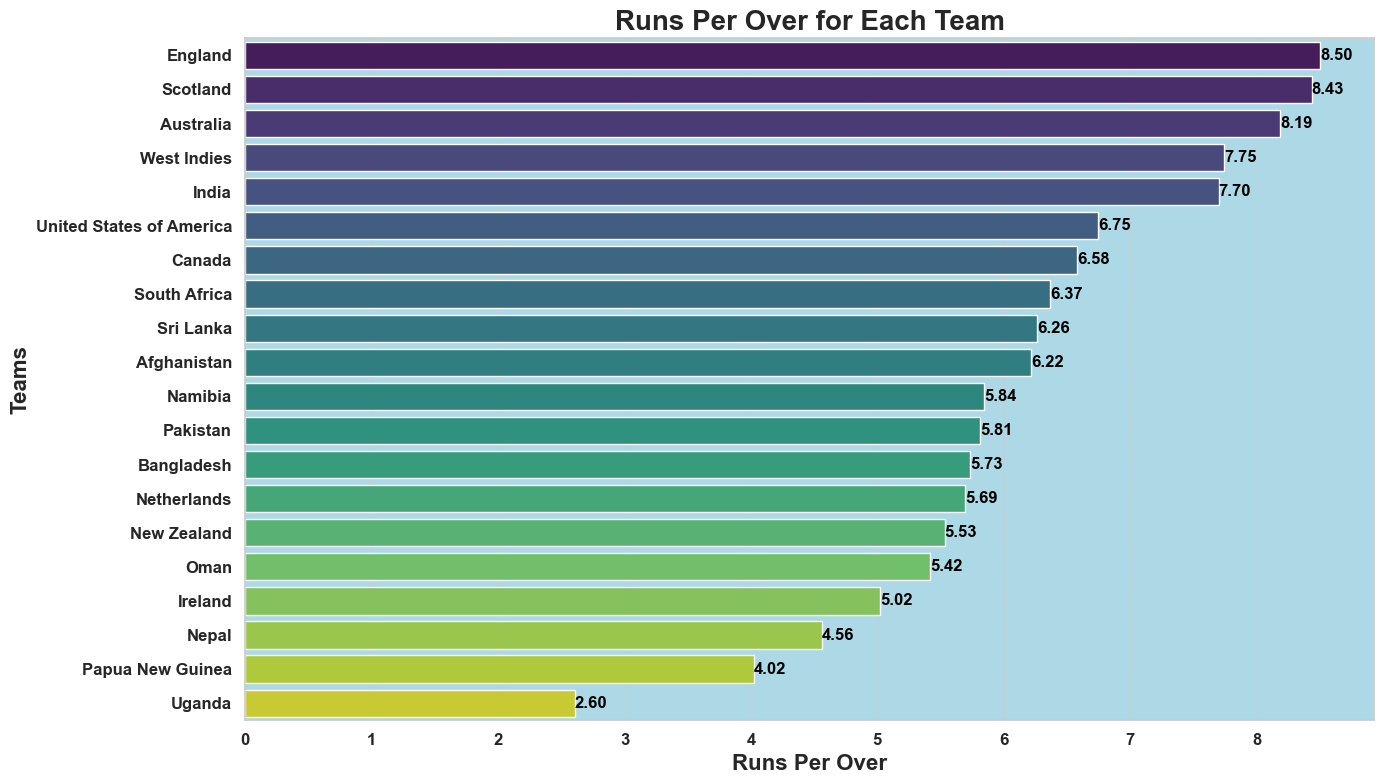

In [24]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()
team_balls = deliveries.groupby('batting_team').size()

runs_per_over = team_runs / (team_balls / 6)
most_runs_per_over = runs_per_over.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(x=most_runs_per_over.values, y=most_runs_per_over.index, palette='viridis')
plt.title('Runs Per Over for Each Team', fontsize=20, weight='bold')
plt.xlabel('Runs Per Over', fontsize=16, weight='bold')
plt.ylabel('Teams', fontsize=16, weight='bold')

for index, value in enumerate(most_runs_per_over.values):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12, color='black', weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

plt.tight_layout()

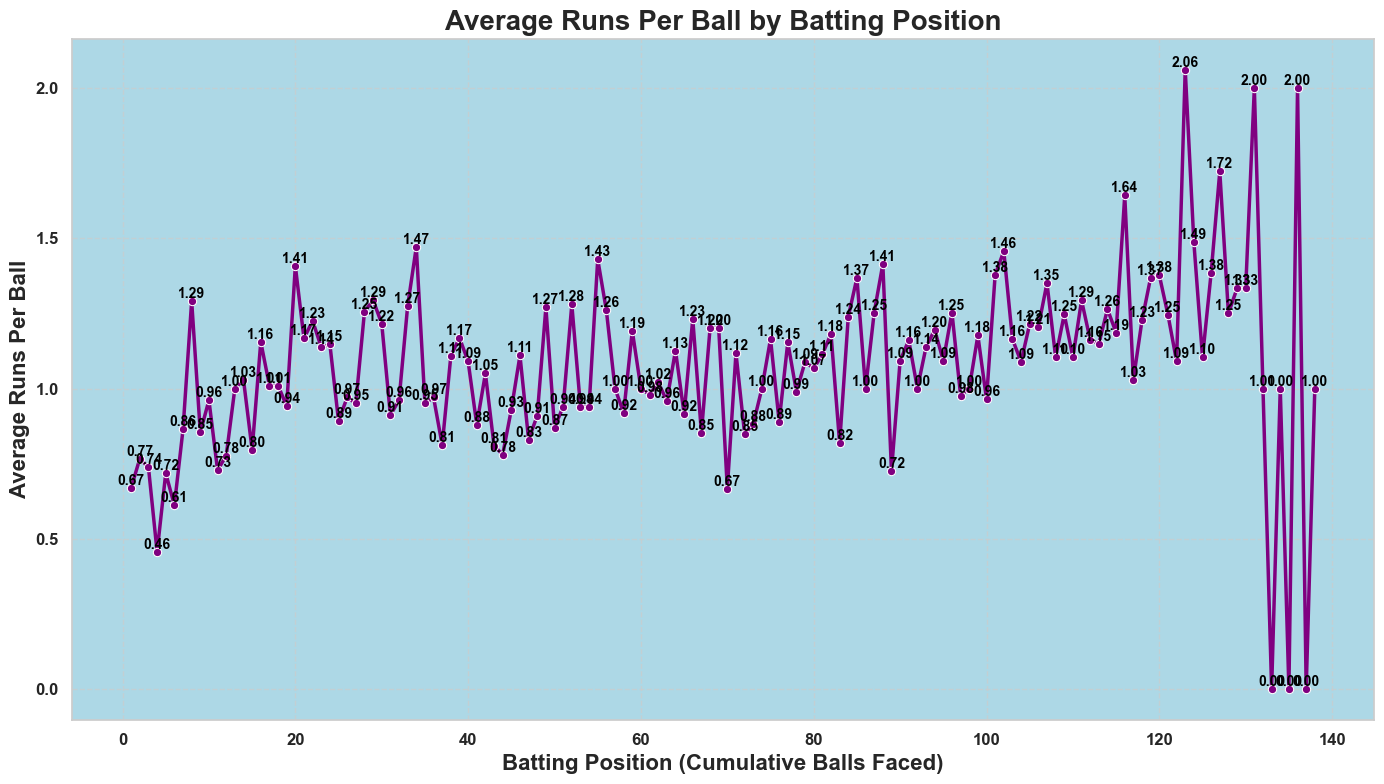

In [25]:
deliveries['ball_number'] = deliveries.groupby(['match_id', 'batting_team']).cumcount() + 1

batting_positions = deliveries.groupby('ball_number')['runs_off_bat'].sum()
balls_faced_positions = deliveries.groupby('ball_number').size()

runs_per_ball_position = batting_positions / balls_faced_positions

runs_per_ball_position_df = runs_per_ball_position.reset_index()
runs_per_ball_position_df.columns = ['Batting Position', 'Runs Per Ball']

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

lineplot = sns.lineplot(data=runs_per_ball_position_df, x='Batting Position', y='Runs Per Ball', marker='o', color='purple', linewidth=2.5)
plt.title('Average Runs Per Ball by Batting Position', fontsize=20, weight='bold')
plt.xlabel('Batting Position (Cumulative Balls Faced)', fontsize=16, weight='bold')
plt.ylabel('Average Runs Per Ball', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for x, y in zip(runs_per_ball_position_df['Batting Position'], runs_per_ball_position_df['Runs Per Ball']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.tight_layout()

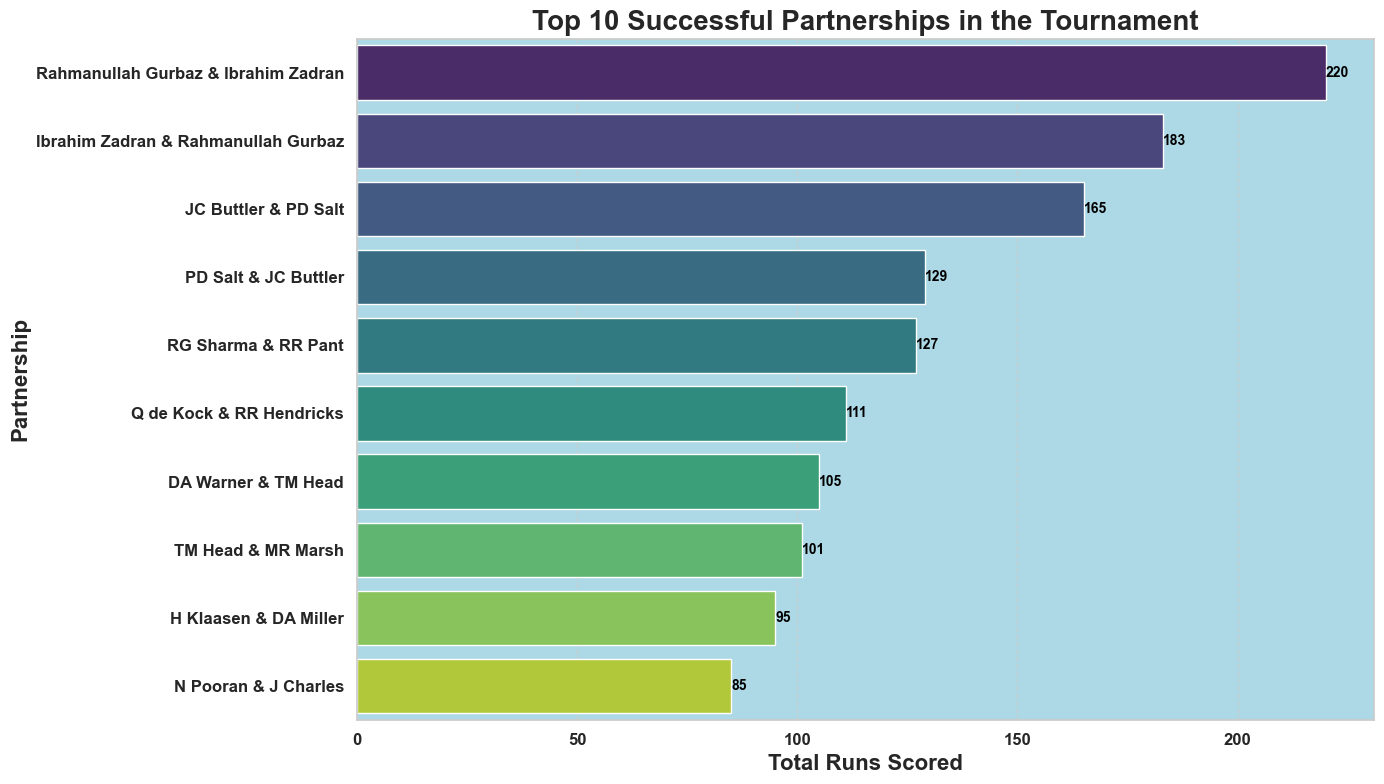

In [26]:
partnerships = deliveries.groupby(['match_id', 'striker', 'non_striker'])['runs_off_bat'].sum()

successful_partnerships = partnerships.groupby(['striker', 'non_striker']).sum().sort_values(ascending=False).reset_index()

top_partnerships = successful_partnerships.head(10)

top_partnerships['partnership'] = top_partnerships['striker'] + ' & ' + top_partnerships['non_striker']

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=top_partnerships, x='runs_off_bat', y='partnership', palette='viridis')
plt.title('Top 10 Successful Partnerships in the Tournament', fontsize=20, weight='bold')
plt.xlabel('Total Runs Scored', fontsize=16, weight='bold')
plt.ylabel('Partnership', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(top_partnerships['runs_off_bat']):
    plt.text(value, index, f'{value}', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()

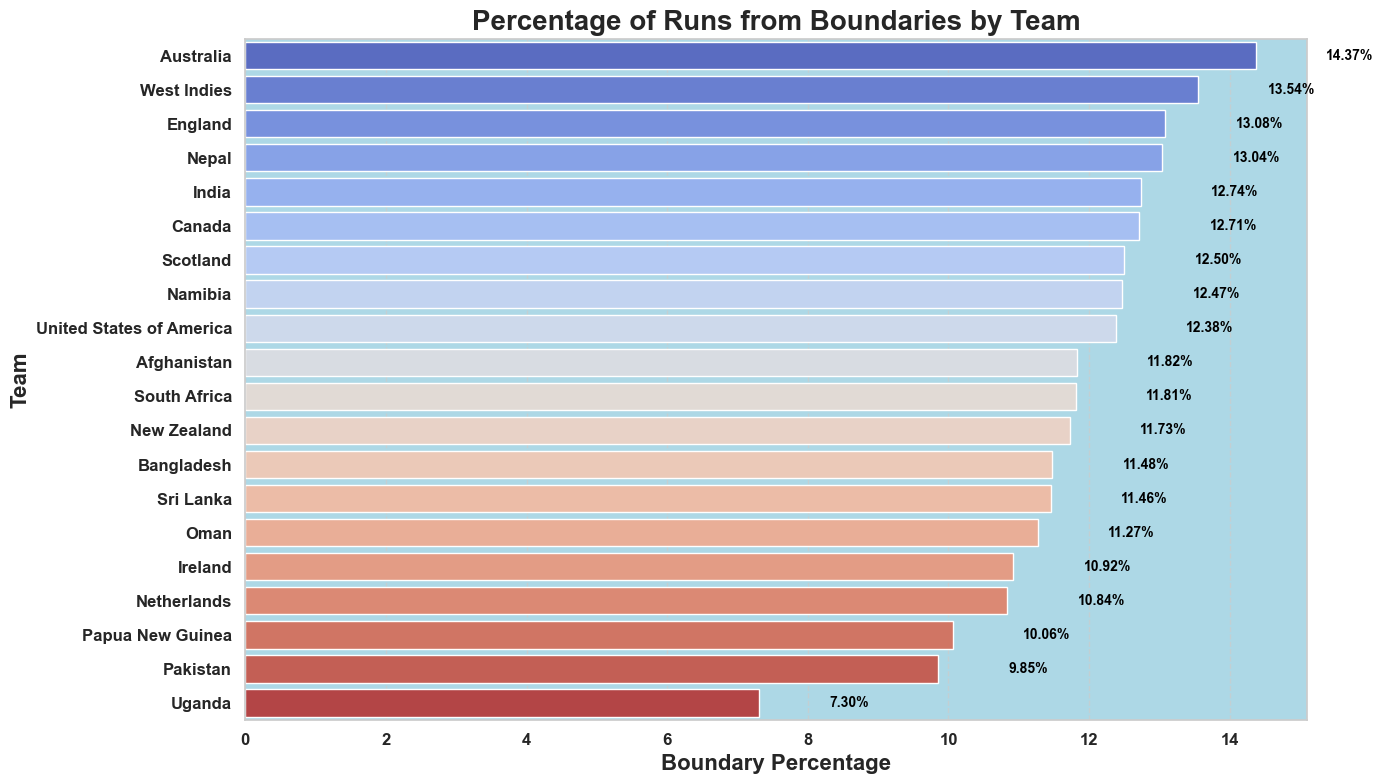

In [27]:
boundaries = deliveries[deliveries['runs_off_bat'].isin([4, 6])]
team_boundaries = boundaries.groupby('batting_team').size()
team_total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum()

boundary_percentage = (team_boundaries / team_total_runs) * 100

boundary_percentage = boundary_percentage.reset_index()
boundary_percentage.columns = ['batting_team', 'boundary_percentage']
boundary_percentage = boundary_percentage.sort_values(by='boundary_percentage', ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=boundary_percentage, x='boundary_percentage', y='batting_team', palette='coolwarm')
plt.title('Percentage of Runs from Boundaries by Team', fontsize=20, weight='bold')
plt.xlabel('Boundary Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(boundary_percentage['boundary_percentage']):
    plt.text(value + 1, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()

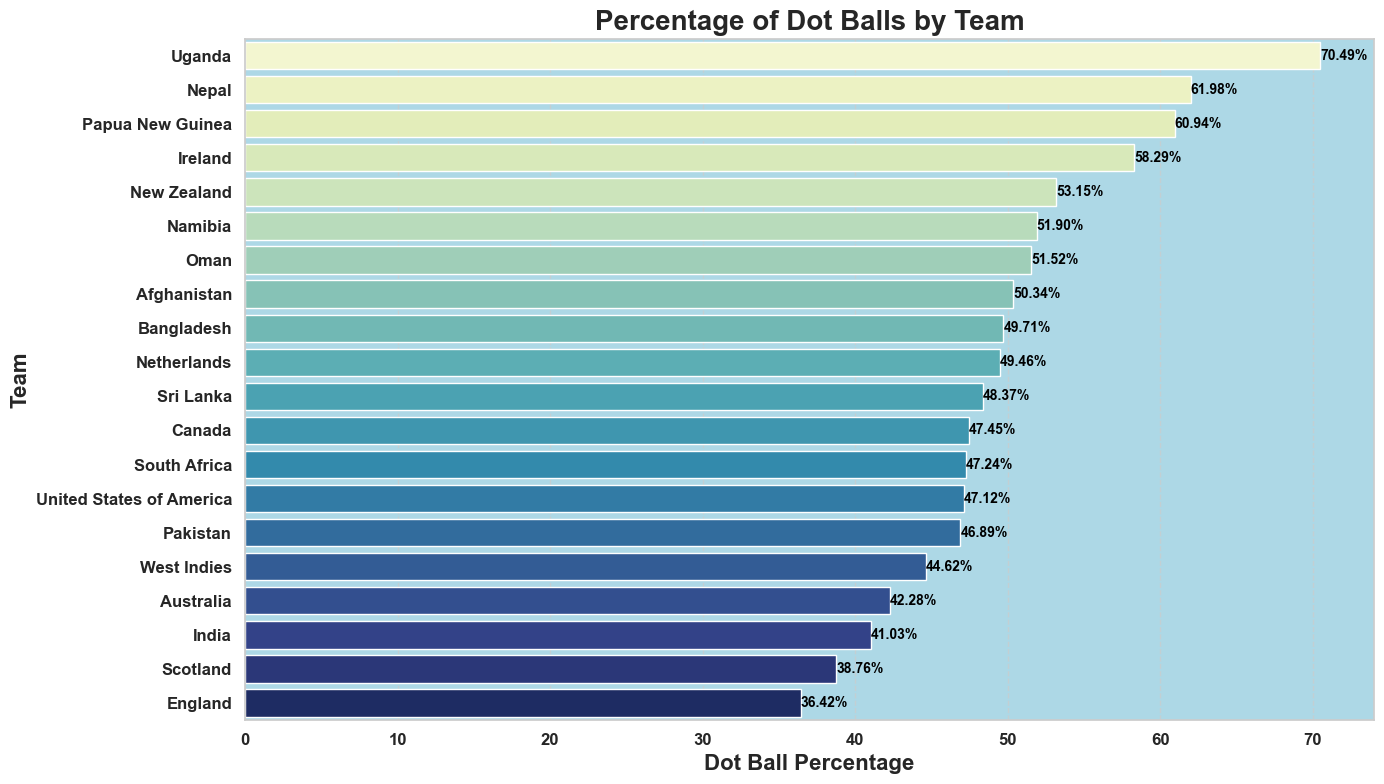

In [28]:
dot_balls = deliveries[deliveries['runs_off_bat'] == 0]
team_dot_balls = dot_balls.groupby('batting_team').size()

dot_ball_percentage = (team_dot_balls / team_balls) * 100

dot_ball_percentage = dot_ball_percentage.reset_index()
dot_ball_percentage.columns = ['batting_team', 'dot_ball_percentage']
dot_ball_percentage = dot_ball_percentage.sort_values(by='dot_ball_percentage', ascending=False)

plt.figure(figsize=(14, 8))
sns.set_style(style="whitegrid")

barplot = sns.barplot(data=dot_ball_percentage, x='dot_ball_percentage', y='batting_team', palette='YlGnBu')
plt.title('Percentage of Dot Balls by Team', fontsize=20, weight='bold')
plt.xlabel('Dot Ball Percentage', fontsize=16, weight='bold')
plt.ylabel('Team', fontsize=16, weight='bold')

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightblue')

for index, value in enumerate(dot_ball_percentage['dot_ball_percentage']):
    plt.text(value, index, f'{value:.2f}%', ha='left', va='center', fontsize=10, color='black', weight='bold')

plt.tight_layout()

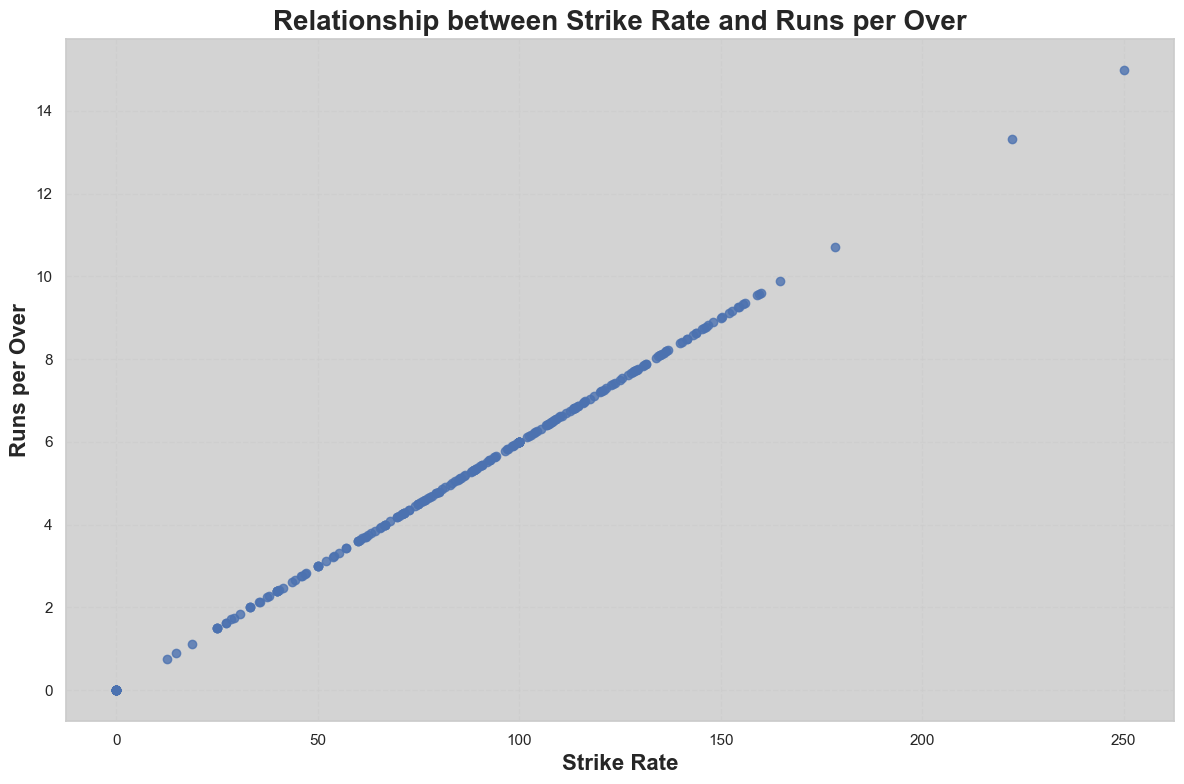

In [29]:
batsman_runs = deliveries.groupby('striker')['runs_off_bat'].sum()
batsman_balls = deliveries.groupby('striker').size()

strike_rate = (batsman_runs / batsman_balls) * 100
batsman_runs_per_over = batsman_runs / (batsman_balls / 6)

strike_rate_runs_per_over = pd.DataFrame({'Strike Rate': strike_rate, 'Runs per Over': batsman_runs_per_over})

plt.figure(figsize=(12, 8))
plt.scatter(strike_rate_runs_per_over['Strike Rate'], strike_rate_runs_per_over['Runs per Over'], alpha=0.8, color='b')
plt.title('Relationship between Strike Rate and Runs per Over', fontsize=20, weight='bold')
plt.xlabel('Strike Rate', fontsize=16, weight='bold')
plt.ylabel('Runs per Over', fontsize=16, weight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().set_facecolor('lightgray')

plt.tight_layout()

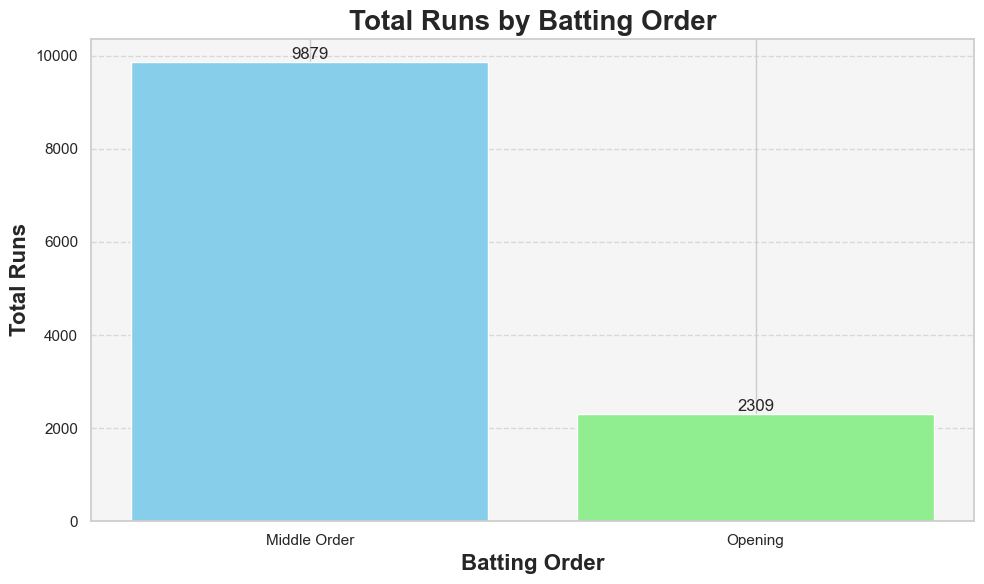

In [30]:
deliveries['batting_order'] = deliveries['ball_number'].apply(lambda x: 'Opening' if x <= 24 else 'Middle Order')

order_runs = deliveries.groupby('batting_order')['runs_off_bat'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(order_runs.index, order_runs.values, color=['skyblue', 'lightgreen'])
plt.title('Total Runs by Batting Order', fontsize=20, weight='bold')
plt.xlabel('Batting Order', fontsize=16, weight='bold')
plt.ylabel('Total Runs', fontsize=16, weight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('whitesmoke')

plt.tight_layout()

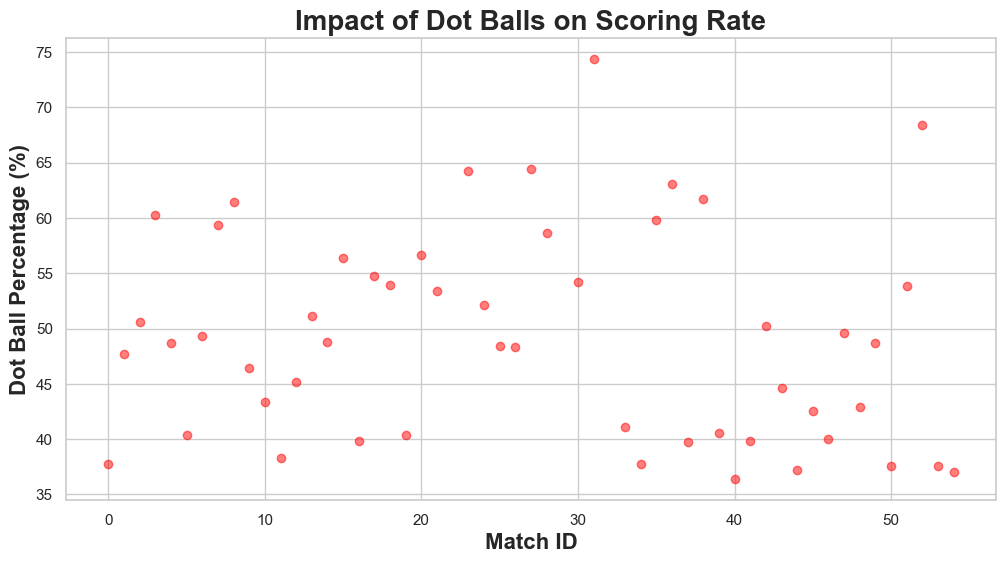

In [31]:
deliveries['is_dot'] = deliveries['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
dot_ball_impact = deliveries.groupby('match_id')['is_dot'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(dot_ball_impact.index, dot_ball_impact * 100, color='red', alpha=0.5)
plt.xlabel('Match ID', fontsize=16, weight='bold')
plt.ylabel('Dot Ball Percentage (%)', fontsize=16, weight='bold')
plt.title('Impact of Dot Balls on Scoring Rate', fontsize=20, weight='bold')
plt.grid(True)